# Import software libraries and load the dataset #

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Load the fashion mnist dataset

- Dataset provided from keras.
- Print the number of training images and testing images.
- Print the number of labels (unique).

In [3]:
# Print the number of training and testing images
print("Number of training images:", len(train_images))
print("Number of testing images:", len(test_images))

print('-------------------------------------------')
# Print the number of unique labels
unique_labels = len(set(train_labels))
print("Number of unique labels:", unique_labels)


Number of training images: 60000
Number of testing images: 10000
-------------------------------------------
Number of unique labels: 10


# What is the shape of each image?

In [4]:
print("Shape of each training image:", train_images.shape[1:])
print("Shape of each testing image:", test_images.shape[1:])


Shape of each training image: (28, 28)
Shape of each testing image: (28, 28)


# The labels are encoded, find the name of each encoded label.

In [5]:
# Define the class labels for Fashion MNIST
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


for encoded_label, class_name in class_labels.items():
    print(f"Encoded Label: {encoded_label} - Class Name: {class_name}")


Encoded Label: 0 - Class Name: T-shirt/top
Encoded Label: 1 - Class Name: Trouser
Encoded Label: 2 - Class Name: Pullover
Encoded Label: 3 - Class Name: Dress
Encoded Label: 4 - Class Name: Coat
Encoded Label: 5 - Class Name: Sandal
Encoded Label: 6 - Class Name: Shirt
Encoded Label: 7 - Class Name: Sneaker
Encoded Label: 8 - Class Name: Bag
Encoded Label: 9 - Class Name: Ankle boot


# Plot 25 samples from the dataset

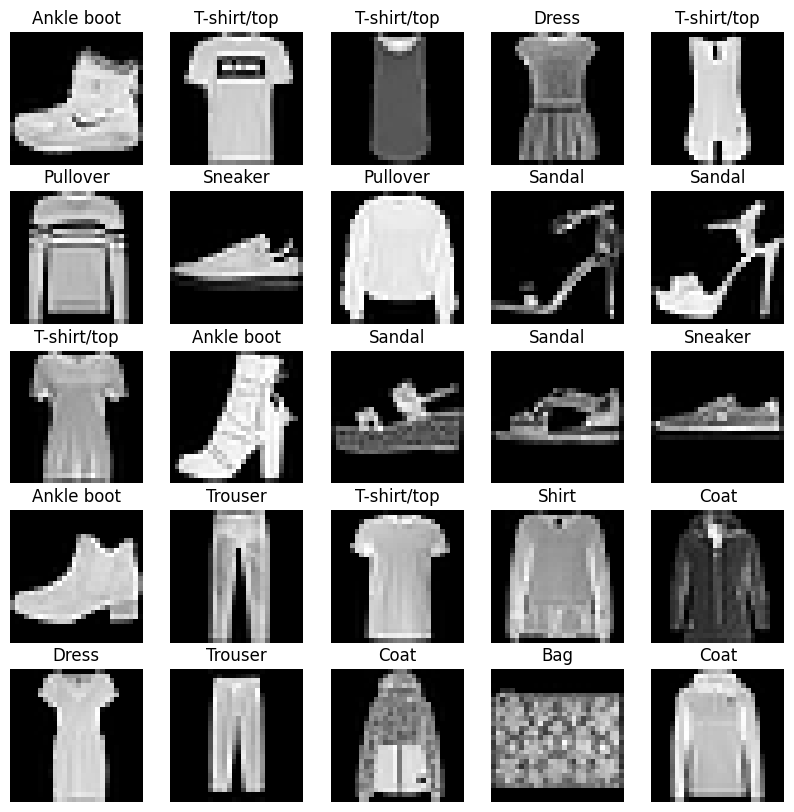

In [6]:
# Plot 25 samples from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_labels[train_labels[i]])
    plt.axis('off')

plt.show()


# Prepare the data for training with Keras

- Hint : Use reshape method.
- Do not forget the one hot encoding process (use the method provided from keras).

In [7]:
#Frist reshape the images.why ? to have a single channel (1) using the reshape method.
train_images_reshaped = train_images.reshape((len(train_images), 28, 28, 1))
test_images_reshaped = test_images.reshape((len(test_images), 28, 28, 1))

# Second normalize pixel values to be between 0 and 1. why? This step helps the neural network converge faster.

train_images_normalized = train_images_reshaped.astype('float32') / 255.0
test_images_normalized = test_images_reshaped.astype('float32') / 255.0

# One-hot encode
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


In [15]:
nRows, nCols = train_images.shape[1:]
nRows, nCols
train_data = train_images.reshape(train_images.shape[0], nRows, nCols)
train_data = train_data.astype('float32')
print('train data shape :', train_data.shape)

test_data = test_images.reshape(test_images.shape[0], nRows, nCols)
test_data = test_data.astype('float32')
print('test data shape  :', test_data.shape)

input_shape = (nRows, nCols)

train_data = train_data / 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

train data shape : (60000, 28, 28)
test data shape  : (10000, 28, 28)


# Split the datasets into training and testing

- Hint : Use the training set (training and validation sets).
- Do not worry about the testing set provided from the dataset we will get with later on, do not touch it!!

In [8]:
# Spliting the training dataset into training and validation sets
train_images_split, validation_images_split, train_labels_split, validation_labels_split = train_test_split(
    train_images_normalized, train_labels_one_hot, test_size=0.2, random_state=42
)


print("Training images shape:", train_images_split.shape)
print("Validation images shape:", validation_images_split.shape)
print("Training labels shape:", train_labels_split.shape)
print("Validation labels shape:", validation_labels_split.shape)


Training images shape: (48000, 28, 28, 1)
Validation images shape: (12000, 28, 28, 1)
Training labels shape: (48000, 10)
Validation labels shape: (12000, 10)


# Build the CNN structure

- The model contains the following layers :-

    1 - First Conv Layer :-
    
    2 - Activation Layer
    
    3 - Pooling Layer
    
    4 - Second Conv Layer
    
    5 - Activation Layer
    
    6 - Pooling Layer
    
    7 - Third Conv Layer
    
    8 - Activation Layer
    
    9 - Pooling Layer
    
    10 - Flatten Layer
    
    11 - Dense Layer
    
    In the Conv layers we have these parameters :-
    
        a. filters : What is the number of filters of the Conv layer, make it 32 (try to change it if you want).
        b. kernel_size : The filter size of the Conv layer, make it 3 by 3 (again try to change it).
        c. input_shape : The image shape.
        d. padding : make it same.
        e. activation : make it linear (also try to change it).
    
    In the hidden layers, we have three activation layers. Search for the best activation function used in our problem, give
    your reasons why did you use it, then use it.
    
    In the Activation layers we have this parameter :-
    
        a. alpha : make it 0.1 (try to change it).
        
    In the Pooling layers we have these parameters :-
    
        a. pool_size : the pooling window size, make it 2 by 2 (try to change it).
        b. padding : make it same.
        
    In the Flatten layer, make it default, because it is basically convert the tensors into vectors.
    
    In the Dense layer we have these parameters :-
    
        a. units : the number of output labels.
        b. activation : the function that will deal with the outputs and find the probability for each one.
            Note : There are several activation functions as an output function, select the sutable for our problem.

In [9]:

model = Sequential()
#--------------------------------------Frist-----------------------------------------
# First Conv Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', activation='linear'))
# Activation Layer
model.add(Activation('relu'))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#--------------------------------------second-----------------------------------------
# Second Conv Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='linear'))
# Activation Layer
model.add(Activation('relu'))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

#--------------------------------------Third-----------------------------------------
# Third Conv Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='linear'))
# Activation Layer
model.add(Activation('relu'))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(units=10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                   

# Compile the model and examine the layers

- Find the best optimizer.
- What is the best loss function in this problem? (multi class).
- Do not forget the metric!! What is the best metric??

In [10]:

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Give me a summary of the NN

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                   

# Plot the structure of the NN and save it as a png image.

- Hint : Use plot_model function from keras.utils

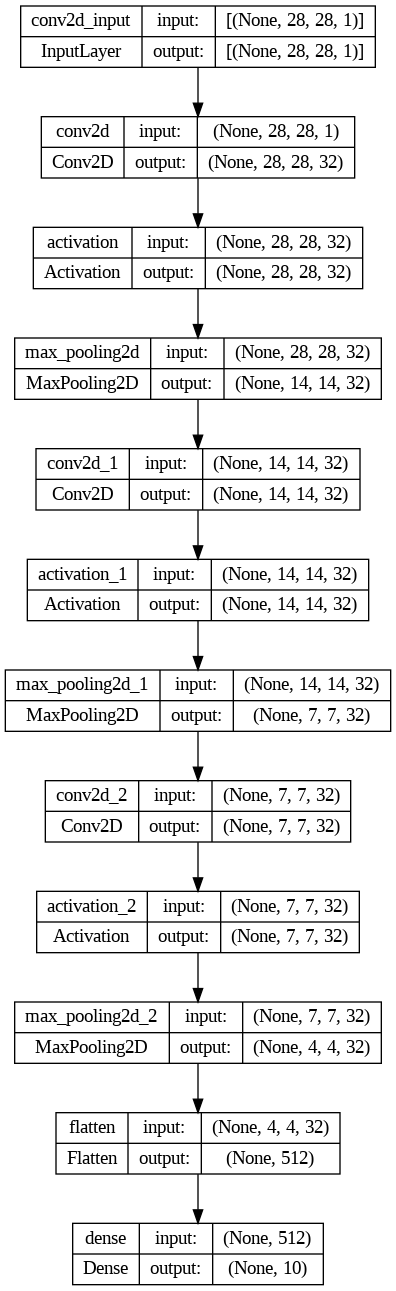

In [12]:
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Train the model

- The x parameter should receive the training images.
- The y parameter should receive the training labels.
- The validation_data parameter should receive the validation data (the data we use with train_test_split).
- The epochs parameter should receive the number of epochs in the model, you can make it 1 it is ok.
    Note : You can increase the epochs, this will decrease the loss, but the loss will stop decreasing in sometimes.
- Make the verbose parameter 1.

In [16]:
history = model.fit(
    train_data, train_labels_one_hot, batch_size=256,
    epochs=10, verbose=1, validation_data=(test_data, test_labels_one_hot),workers=8
)


Epoch 1/10
235/235 [==============================] - 32s 131ms/step - loss: 0.7416 - accuracy: 0.7408 - val_loss: 0.4805 - val_accuracy: 0.8308
Epoch 2/10
235/235 [==============================] - 31s 133ms/step - loss: 0.4180 - accuracy: 0.8504 - val_loss: 0.4271 - val_accuracy: 0.8488
Epoch 3/10
235/235 [==============================] - 30s 127ms/step - loss: 0.3591 - accuracy: 0.8718 - val_loss: 0.3629 - val_accuracy: 0.8715
Epoch 4/10
235/235 [==============================] - 30s 127ms/step - loss: 0.3258 - accuracy: 0.8834 - val_loss: 0.3545 - val_accuracy: 0.8692
Epoch 5/10
235/235 [==============================] - 32s 135ms/step - loss: 0.3086 - accuracy: 0.8889 - val_loss: 0.3334 - val_accuracy: 0.8831
Epoch 6/10
235/235 [==============================] - 30s 127ms/step - loss: 0.2899 - accuracy: 0.8964 - val_loss: 0.3144 - val_accuracy: 0.8892
Epoch 7/10
235/235 [==============================] - 32s 138ms/step - loss: 0.2811 - accuracy: 0.8993 - val_loss: 0.3056 - val_ac

# Evaluate the model on the test data

- Use evaluate function to find the performance of the model.
- The x parameter should receive the testing images (the testing images we get from the dataset).
- The y parameter should receive the testing labels.
- You need to print the metric you choose before and the loss values.

In [22]:
test_loss, test_accuracy = model.evaluate(x=test_images, y=test_labels_one_hot)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


313/313 [==============================] - 2s 8ms/step - loss: 48.7461 - accuracy: 0.8579
Test Accuracy: 85.79%
Test Loss: 48.7461


# Make predictions on the test data

- Just print the first ten predictions and compare them with the actual values.

In [23]:
predictions = model.predict(test_images)

# Print the first ten predictions and compare with actual values
for i in range(10):
    print(f"Sample {i + 1}:")
    print(f"Predicted: {predictions[i].argmax()}")
    print(f"Actual: {test_labels[i]}")
    print()


313/313 [==============================] - 2s 6ms/step
Sample 1:
Predicted: 9
Actual: 9

Sample 2:
Predicted: 2
Actual: 2

Sample 3:
Predicted: 1
Actual: 1

Sample 4:
Predicted: 1
Actual: 1

Sample 5:
Predicted: 6
Actual: 6

Sample 6:
Predicted: 1
Actual: 1

Sample 7:
Predicted: 4
Actual: 4

Sample 8:
Predicted: 6
Actual: 6

Sample 9:
Predicted: 5
Actual: 5

Sample 10:
Predicted: 7
Actual: 7



# Visualize the predictions for several examples (25 is enough).

- For each image, print the image with the actual value and predicted value.

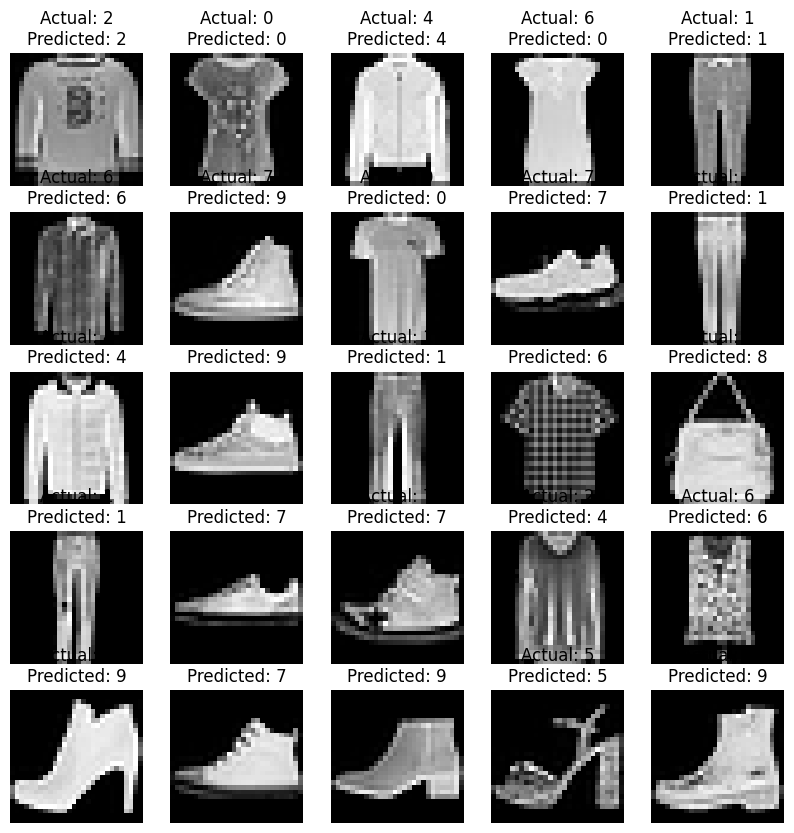

In [24]:
indices = np.random.choice(len(test_images), 25, replace=False)

plt.figure(figsize=(10, 10))
for i, index in enumerate(indices, 1):
    plt.subplot(5, 5, i)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {test_labels[index]}\nPredicted: {predictions[index].argmax()}')
    plt.axis('off')

plt.show()


# Save the model as pickle file

In [25]:
import pickle

model.save('my_model.h5')
with open('my_model.pkl', 'wb') as file:
    pickle.dump(model, file)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
